In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Define ticker and date range
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Save to CSV
data.to_csv(f"{ticker}_data.csv", index=False)

print("Data saved to stock_data.csv")

[*********************100%***********************]  1 of 1 completed

Data saved to stock_data.csv


In [11]:
print(data.dtypes)

Price   Ticker
Date              datetime64[ns]
Close   AAPL             float64
High    AAPL             float64
Low     AAPL             float64
Open    AAPL             float64
Volume  AAPL               int64
dtype: object


In [12]:
data.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
1,2020-01-03,72.009125,72.771752,71.783969,71.941336,146322800
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
3,2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
4,2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200
5,2020-01-09,74.962807,75.156487,74.132390,74.384173,170108400
6,2020-01-10,75.132271,75.698802,74.628697,75.197644,140644800
7,2020-01-13,76.737411,76.764047,75.330785,75.449422,121532000
8,2020-01-14,75.701225,76.885120,75.577757,76.674490,161954400


In [13]:
data.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
996,2023-12-15,196.390900,197.215933,195.824294,196.351130,128256700
997,2023-12-18,194.720901,195.456491,193.229854,194.919705,55751900
998,2023-12-19,195.764648,195.774583,194.720912,194.989305,40714100
999,2023-12-20,193.667252,196.500234,193.667252,195.724890,52242800
1000,2023-12-21,193.518112,195.903798,192.345162,194.929651,46482500
1001,2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800
1002,2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300
1003,2023-12-27,191.997269,192.345186,189.949565,191.341219,48087700
1004,2023-12-28,192.424698,193.498254,192.017141,192.981353,34049900


In [14]:
# Load the stock data from CSV
def load_data(ticker):
    df = pd.read_csv(f"{ticker}_data.csv")
    return df

# Clean the data (ensure numeric columns are of the correct type)
def clean_data(df):
    # Ensure 'Close' and 'Volume' are numeric, force errors to NaN, then drop those rows
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

    # Drop rows with any NaN values after conversion
    df = df.dropna(subset=['Close', 'Volume'])
    return df

# Calculate Moving Averages (MA)
def calculate_moving_averages(df):
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA100'] = df['Close'].rolling(window=100).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df

# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()  # Calculate daily returns
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Positive gains
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Negative losses
    rs = gain / loss  # Relative strength
    df['RSI'] = 100 - (100 / (1 + rs))  # RSI formula
    return df

# Normalize Volume (relative to the average volume over a specific period)
def normalize_volume(df, window=50):
    df['Norm_Volume'] = df['Volume'] / df['Volume'].rolling(window=window).mean()
    return df

# Calculate Bollinger Bands (Upper and Lower)
def calculate_bollinger_bands(df, window=20, num_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std)
    return df

In [15]:
def plot_bollinger_bands_and_rsi(df):
    
    # Bollinger Bands plot
    plt.figure(figsize=(14, 7))
    
    # Plot Close price, Upper and Lower Bollinger Bands
    plt.subplot(2, 1, 1)
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=1)
    plt.plot(df['Date'], df['Bollinger_Upper'], label='Bollinger Upper', color='red', linestyle='--', linewidth=1)
    plt.plot(df['Date'], df['Bollinger_Lower'], label='Bollinger Lower', color='red', linestyle='--', linewidth=1)
    plt.title('Bollinger Bands')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    
    # RSI plot
    plt.subplot(2, 1, 2)
    plt.plot(df['Date'], df['RSI'], label='RSI', color='blue', linewidth=1)
    plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
    plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
    plt.title('Relative Strength Index (RSI)')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    
    plt.tight_layout()
    plt.show()


In [16]:
# Main feature engineering function
def feature_engineering(ticker):
    # Load the raw stock data
    df = load_data(ticker)
    
    # Clean the data
    df = clean_data(df)
    
    # Calculate each of the features
    df = calculate_moving_averages(df)
    df = calculate_rsi(df)
    df = normalize_volume(df)
    df = calculate_bollinger_bands(df)
    
    # Drop rows with NaN values (especially for rolling calculations)
    df = df.dropna()
    
    # Save the new dataframe with additional features
    df.to_csv(f"{ticker}_stock_features.csv", index=False)
    print(f"Enhanced data saved to {ticker}_stock_features.csv")

    plot_bollinger_bands_and_rsi(df)

Enhanced data saved to AAPL_stock_features.csv


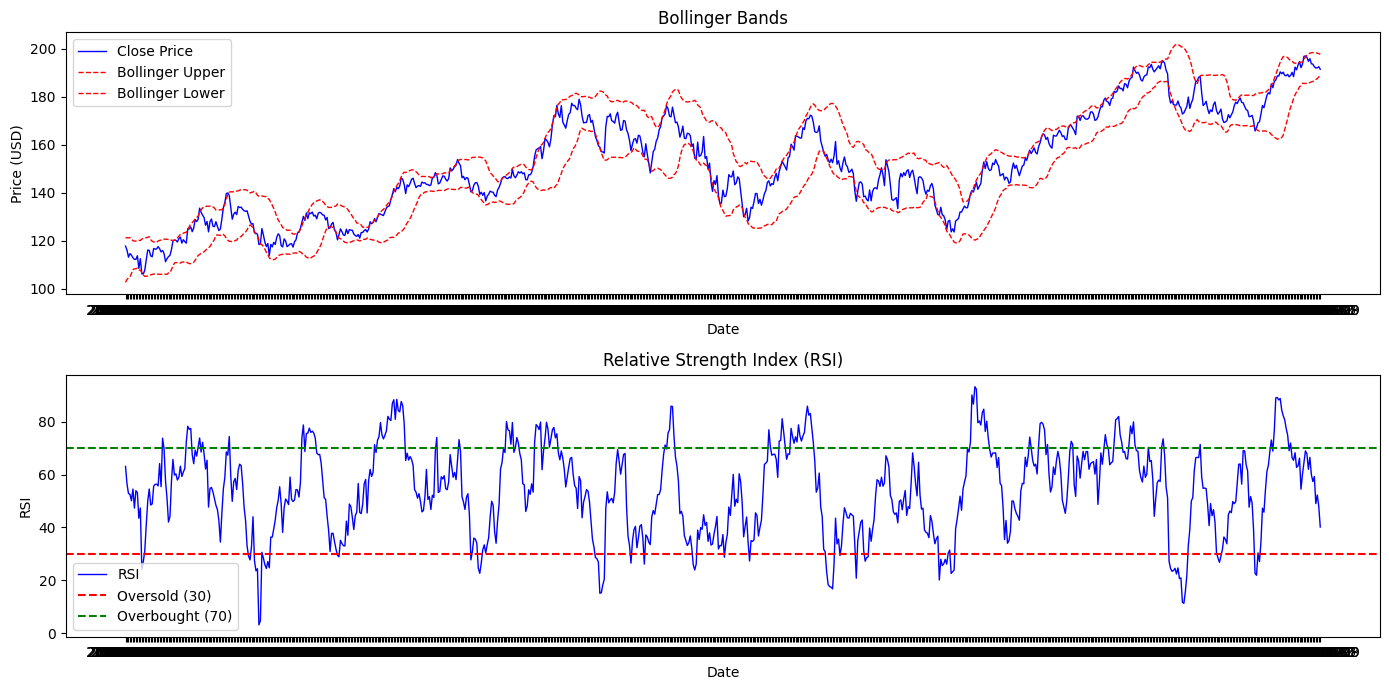

In [17]:
ticker = 'AAPL'
feature_engineering(ticker)

In [18]:
df = pd.read_csv(f"{ticker}_stock_features.csv")

In [19]:
df.head(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower
0,2020-10-15,117.704163,118.181959,115.207912,115.763718,112559200.0,114.778872,114.007471,101.501437,86.176185,63.102252,0.630404,121.173470,102.621445
1,2020-10-16,116.056244,118.523250,115.851474,118.259969,115393800.0,115.363931,114.111270,101.887924,86.392886,56.510581,0.652642,121.189600,103.792983
2,2020-10-19,113.091942,117.421375,112.779911,116.972830,120639300.0,115.313223,114.206196,102.244427,86.598300,52.833578,0.688337,121.133538,104.424352
3,2020-10-20,114.583839,116.017236,112.750649,113.306455,124423700.0,115.737389,114.299464,102.616603,86.808305,52.563296,0.717129,121.254064,104.859629
4,2020-10-21,113.959801,115.753979,113.550254,113.764776,89946000.0,115.911932,114.445632,102.973024,87.016896,50.121917,0.524334,120.661628,106.402786
5,2020-10-22,112.867676,115.100653,111.736558,114.525341,101988000.0,115.987990,114.499067,103.314899,87.214216,54.524356,0.598974,119.970310,107.828352
6,2020-10-23,112.175362,113.647763,111.434284,113.491743,82572600.0,115.799798,114.499652,103.645518,87.400279,47.335750,0.492321,119.804699,108.263091
7,2020-10-26,112.185112,113.647760,110.069142,111.171008,111850700.0,114.888081,114.502431,103.983049,87.585543,53.926044,0.671185,119.803017,108.273550
8,2020-10-27,113.696510,114.359578,111.687809,112.614150,92276800.0,114.449287,114.541289,104.313355,87.770339,53.206730,0.555547,119.778112,108.543205
9,2020-10-28,108.430984,112.555656,108.333476,112.185121,143937800.0,113.475163,114.456211,104.586237,87.933988,43.497760,0.862590,120.094928,107.776867


In [20]:
df.tail(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower
797,2023-12-15,196.390900,197.215933,195.824294,196.351130,128256700.0,193.506212,182.575588,180.458438,176.124053,67.844096,2.335530,197.251501,185.499503
798,2023-12-18,194.720901,195.456491,193.229854,194.919705,55751900.0,194.148355,182.946034,180.490092,176.350047,62.002614,1.015776,197.583852,185.783452
799,2023-12-19,195.764648,195.774583,194.720912,194.989305,40714100.0,194.498254,183.307573,180.506308,176.567399,66.535606,0.742247,198.088915,185.824113
800,2023-12-20,193.667252,196.500234,193.667252,195.724890,52242800.0,194.747755,183.639077,180.495405,176.785303,59.991816,0.949465,198.228738,186.100789
801,2023-12-21,193.518112,195.903798,192.345162,194.929651,46482500.0,194.788507,183.939603,180.491337,176.996175,57.388232,0.845105,198.348907,186.315607
802,2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800.0,194.578769,184.200591,180.506573,177.212966,59.246162,0.679785,198.299954,186.725395
803,2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300.0,194.565848,184.487574,180.530320,177.437368,49.031943,0.533966,198.182191,187.167214
804,2023-12-27,191.997269,192.345186,189.949565,191.341219,48087700.0,194.410777,184.779126,180.646071,177.652516,52.291500,0.889346,198.093511,187.529254
805,2023-12-28,192.424698,193.498254,192.017141,192.981353,34049900.0,193.975392,185.110399,180.797225,177.859307,47.920385,0.635249,197.852622,188.188630
806,2023-12-29,191.380966,193.239801,190.585738,192.742785,42628800.0,193.420721,185.446806,180.928524,178.058899,40.185228,0.798918,197.634806,188.662906


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             807 non-null    object 
 1   Close            807 non-null    float64
 2   High             807 non-null    float64
 3   Low              807 non-null    float64
 4   Open             807 non-null    float64
 5   Volume           807 non-null    float64
 6   MA10             807 non-null    float64
 7   MA50             807 non-null    float64
 8   MA100            807 non-null    float64
 9   MA200            807 non-null    float64
 10  RSI              807 non-null    float64
 11  Norm_Volume      807 non-null    float64
 12  Bollinger_Upper  807 non-null    float64
 13  Bollinger_Lower  807 non-null    float64
dtypes: float64(13), object(1)
memory usage: 88.4+ KB
